# [Lab Session 2](otsu.ipynb)

In [90]:
import numpy as np
import matplotlib.pyplot as plt

**[Task 1.1.]()** Load the image:

In [91]:
imgf = plt.imread("data/NIH3T3/im/dna-0.png")

**[Task 1.2.]()** Quantify the image into 256 bins:

In [92]:
img8 = (imgf * 255).round().astype(np.uint8)
print(img8)

[[37 39 38 ... 20 20 19]
 [41 38 38 ... 20 21 21]
 [38 38 40 ... 21 21 20]
 ...
 [22 21 22 ... 24 23 23]
 [22 23 22 ... 24 23 24]
 [22 21 22 ... 24 24 23]]


**[Task 1.3.]()** Compute the image histogram:

In [93]:
h = np.zeros(256)

for i in range(256):
    h[i] = np.sum(img8 == i)



Show the computed histogram:

<BarContainer object of 256 artists>

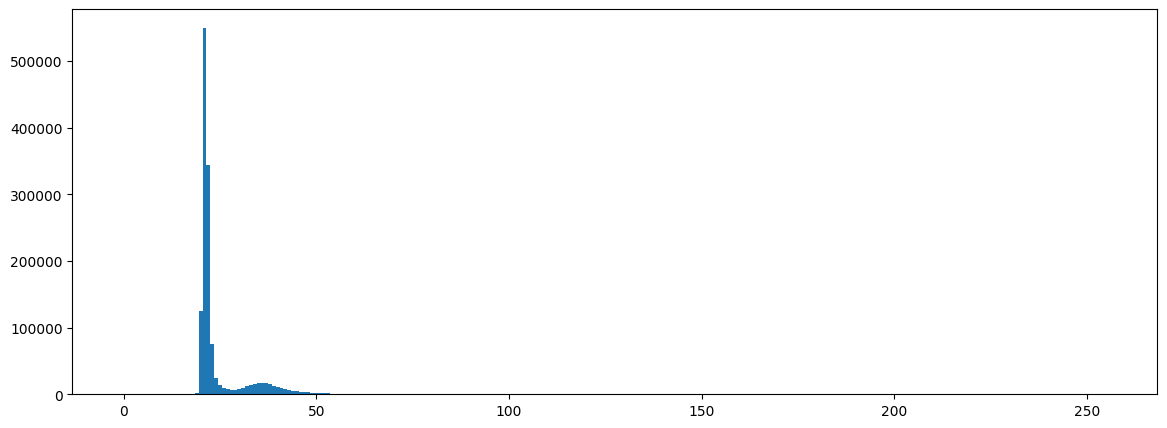

In [94]:
plt.figure(figsize=(14,5))
plt.bar(range(256), h, width=1)

**[Task 1.4.]()** Implement the method of Otsu:

In [ ]:
mög_T = np.inf

for T in range (0, 256):
    class_1 = img8[img8 < T ] #[0, T-1]
    class_2 = img8[img8 >= T] #[T, 255]
    # Klassen definieren
    
    # anzahl Pixel in den Klassen
    N_1 = len(class_1)
    N_2 = len(class_2)

    # Varianz berechnen
    sigma_1 = np.var(class_1)
    sigma_2 = np.var(class_2)

    # formel otsu
    min_var_T = N_1 * sigma_1 + N_2 * sigma_2

    if min_T < mög_T:
        mög_T = min_var_T
    



#Varianz jeder Klasse


/usr/local/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.12/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/local/lib/python3.12/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


**[Task 1.5.]()** Perform Otsu thresholding:

**[Task 1.6.]()** Compute the Dice coefficient: